The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [100]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Start coding here!

In [101]:
df2 = pd.read_csv("nobel.csv")

In [102]:
df2.describe()

,year,laureate_id
count,1000.000000,1000.000000
mean,1973.721000,509.099000
std,34.523195,298.130617
min,1901.000000,1.000000
25%,1949.750000,250.750000
50%,1979.000000,500.500000
75%,2003.000000,764.250000
max,2023.000000,1034.000000


In [103]:
df2[["year", "laureate_id"]].head(10)

,year,laureate_id
0,1901,160
1,1901,569
2,1901,293
3,1901,462
4,1901,463
5,1901,1
6,1902,161
7,1902,571
8,1902,294
9,1902,464


In [104]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  1000 non-null   int64 
 1   category              1000 non-null   object
 2   prize                 1000 non-null   object
 3   motivation            912 non-null    object
 4   prize_share           1000 non-null   object
 5   laureate_id           1000 non-null   int64 
 6   laureate_type         1000 non-null   object
 7   full_name             1000 non-null   object
 8   birth_date            968 non-null    object
 9   birth_city            964 non-null    object
 10  birth_country         969 non-null    object
 11  sex                   970 non-null    object
 12  organization_name     736 non-null    object
 13  organization_city     735 non-null    object
 14  organization_country  735 non-null    object
 15  death_date            596 non-null    o

In [105]:
# What is the most commonly awarded gender and birth country?
# Store your answers as string variables top_gender and top_country.

top_gender = df2["sex"].value_counts().idxmax()
top_gender

'Male'

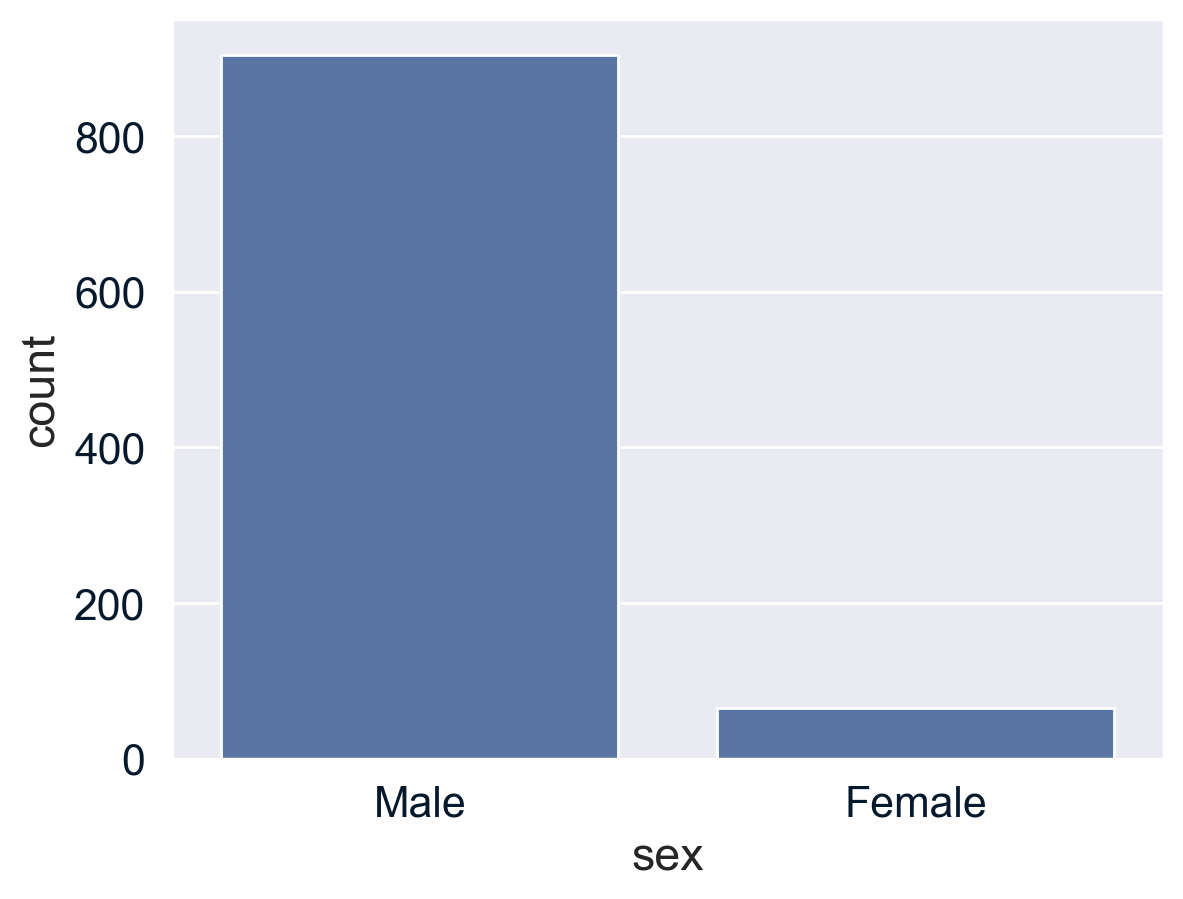

In [106]:
sns.countplot(x = "sex", data = df2)
plt.show()

In [107]:
top_country = df2["birth_country"].value_counts().idxmax()
top_country

'United States of America'

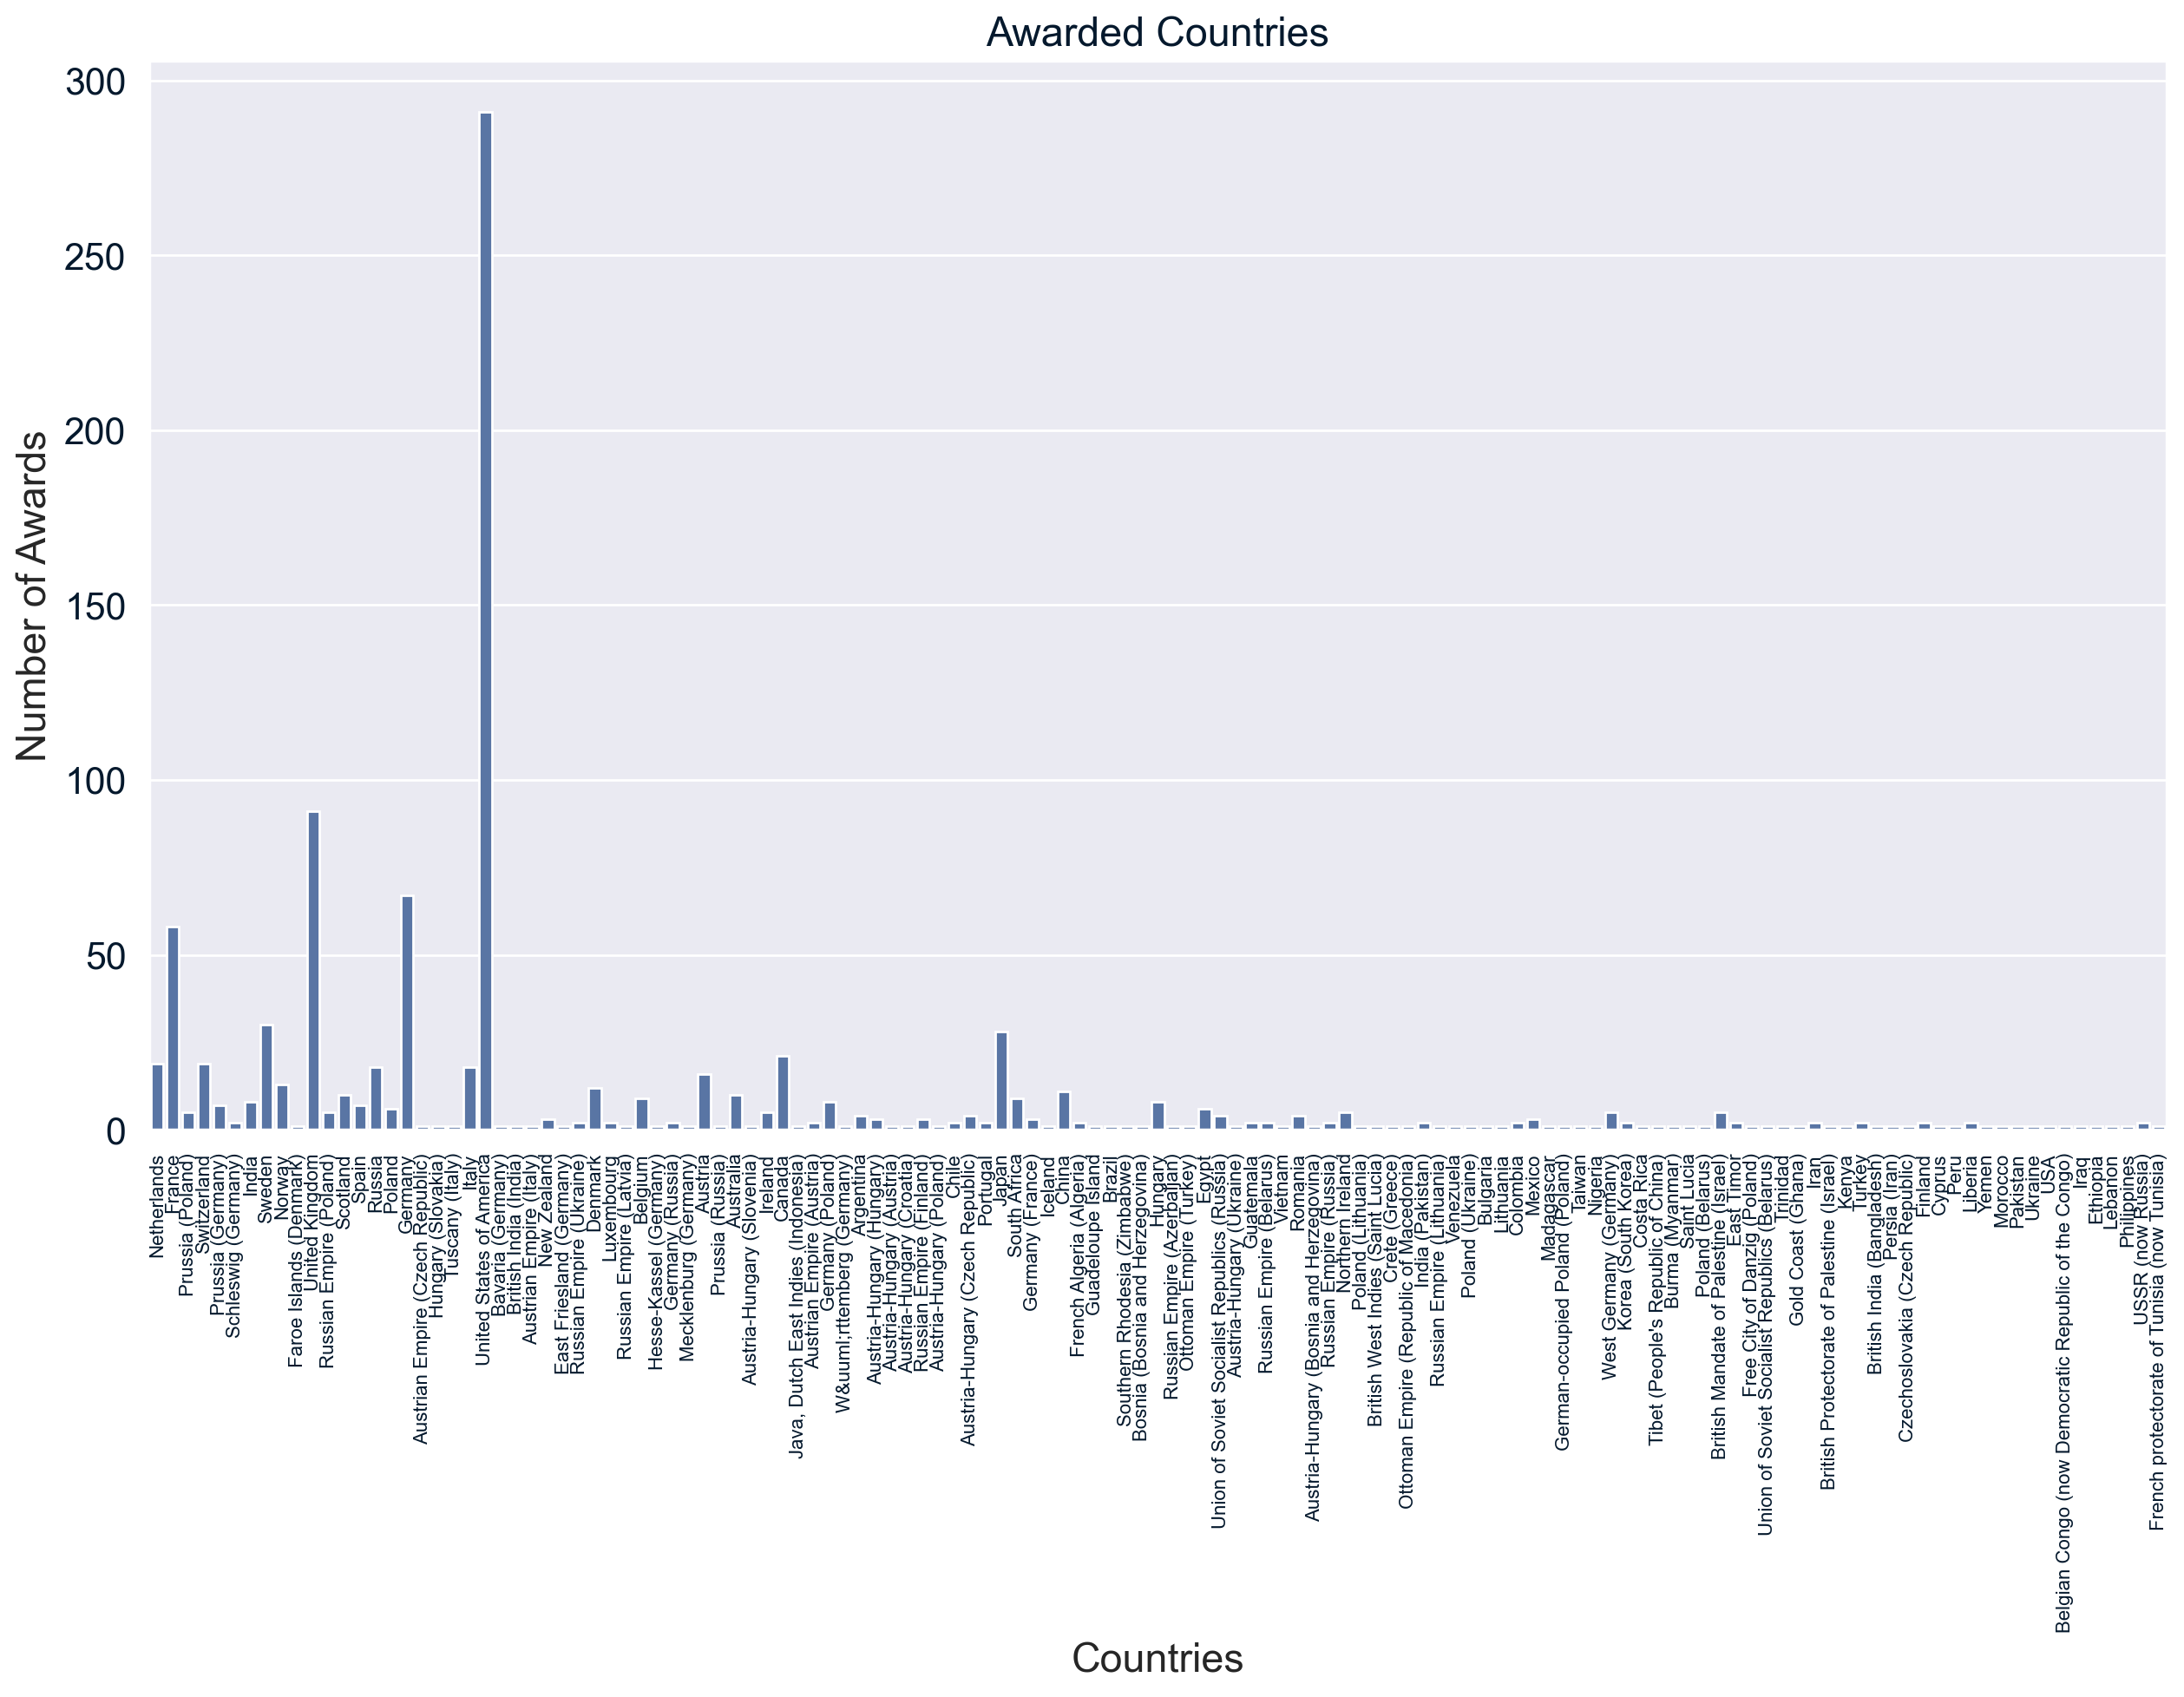

In [108]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.set(font_scale=1.4)
sns.countplot(x = "birth_country", data = df2, ax = ax)
ax.set_xlabel("Countries")  
ax.set_ylabel("Number of Awards")  
plt.title("Awarded Countries")
plt.xticks(rotation=90, fontsize= 8)
plt.show()

In [109]:
# Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

# Store this as an integer called max_decade_usa.

# Extracting decade from the year
df2['decade'] = (df2['year'] // 10) * 10
df2.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,decade
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,1900
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,1900
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,1900
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,1900
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,1900


In [110]:
# Calculate the proportion of USA born winners per decade
df2['us_born'] = df2['birth_country'] == 'United States of America'

In [111]:
# Calculate the ratio of U.S.-born laureates to total laureates for each decade
df2['decade'] = (np.floor(df2['year'] / 10) * 10).astype(int)
us_born1 = df2.groupby('decade', as_index = False)['us_born'].mean()

In [112]:
print(df2['decade'])

In [113]:
# We determined that decade in the previous step and saved it to the variable max_decade.
max_decade_usa = df2[(df2["birth_country"] == "United States of America") & (df2["decade"] == max_decade)].shape[0]

# Now, get the decade with the maximum count and assign it to the variable.
max_decade_usa = df2[df2["birth_country"] == "United States of America"]["decade"].value_counts().idxmax()
max_decade_usa

2000

In [114]:
df2['female_winner'] = df2['sex'] == 'Female'
df2['female_winner'].head()

0    False
1    False
2    False
3    False
4    False
Name: female_winner, dtype: bool

In [115]:
# Females per decade
females_decade = df2.groupby(['decade','category'], as_index=False)['female_winner'].mean()
females_decade

,decade,category,female_winner
0,1900,Chemistry,0.000000
1,1900,Literature,0.100000
2,1900,Medicine,0.000000
3,1900,Peace,0.071429
4,1900,Physics,0.076923
...,...,...,...
67,2020,Economics,0.111111
68,2020,Literature,0.500000
69,2020,Medicine,0.125000
70,2020,Peace,0.285714


In [116]:
# Find the decade and category with the highest proportion of female laureates
max_female_decade = females_decade[females_decade['female_winner'] == females_decade['female_winner'].max()][['decade', 'category']]
max_female_decade

,decade,category
68,2020,Literature


In [117]:
max_female_dict = {max_female_decade['decade'].values[0]: max_female_decade['category'].values[0]}
max_female_dict

{2020: 'Literature'}

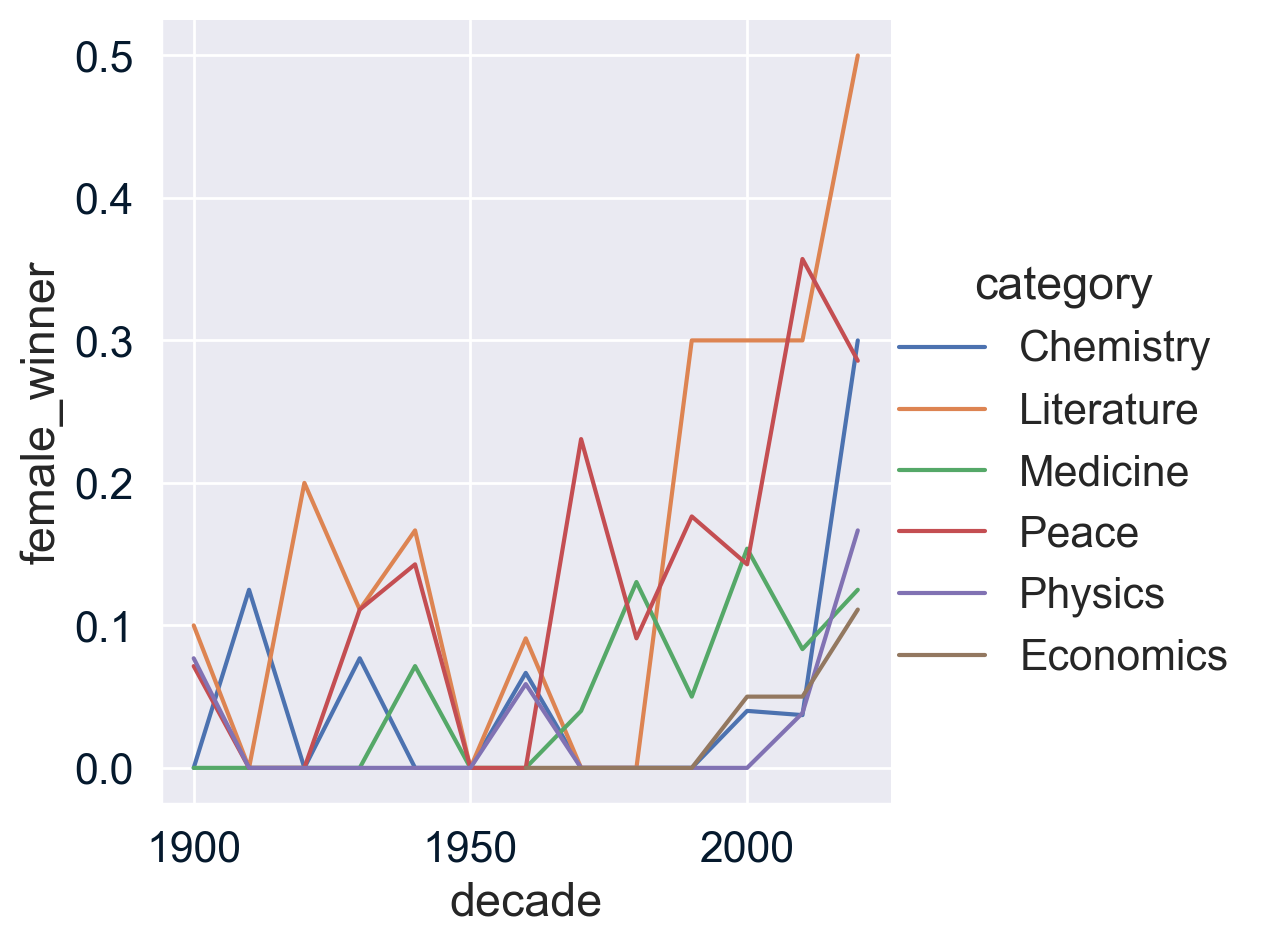

In [118]:
# female winners with % winners on the y-axis
ax2 = sns.relplot(x='decade', y='female_winner', hue='category', data=females_decade, kind="line")

In [119]:
# Who was the first woman to receive a Nobel Prize, and in what category?

# Save your string answers as first_woman_name and first_woman_category.

woman = df2[df2['female_winner']]

min_row = woman[woman['year'] == woman['year'].min()]

first_woman_name = min_row['full_name'].values[0]
print(first_woman_name)

Marie Curie, née Sklodowska


In [120]:
first_woman_category = min_row['category'].values[0]
print(first_woman_category)

Physics


In [121]:
# Which individuals or organizations have won more than one Nobel Prize throughout the years?

# Store the full names in a list named repeat_list.

counts = df2['full_name'].value_counts()
repeat = counts[counts >=2].index
repeat_list = list(repeat)

print(repeat_list)

['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']
